In [217]:
import pandas as pd
import os
import json  # Importing the json module

def load_json_to_table(directory, filename_prefix):
    """
    Reads all JSON files in the specified directory that start with the given filename prefix
    and stores their contents in a pandas DataFrame.

    :param directory: Directory where the JSON files are located.
    :param filename_prefix: Prefix of the filename to match.
    :return: A pandas DataFrame containing the data from all matching JSON files.
    """
    data_frames = []

    # List all files in the directory
    for file in os.listdir(directory):
        if file.startswith(filename_prefix) and file.endswith('.json'):
            file_path = os.path.join(directory, file)
            with open(file_path, 'r') as json_file:
                data = json.load(json_file)
                data_frame = pd.DataFrame([data])
                data_frames.append(data_frame)

    # Concatenate all data frames into a single data frame
    if data_frames:
        combined_data_frame = pd.concat(data_frames, ignore_index=True)
        return combined_data_frame.groupby('n').mean()
    else:
        print('No files found in directory: ' + directory + ' with filename prefix: ' + filename_prefix)
        return pd.DataFrame().groupby('n').mean()  # Return an empty DataFrame if no files match

In [218]:
prefixes = ["cpu_manhattan", "cpu_euclidean", "gpu_scan", "cub_scan", "thrust_scan", "thrust_copy","convex_hull_2","andrew_graham", "omp_manhattan", "omp_euclidean"]

# Example usage of the function
directory = '../data/'
data_frames = {}

# Loading JSON data for each prefix into a separate data frame
for prefix in prefixes:
    data_frames[prefix] = load_json_to_table(directory, prefix+'_normal_')

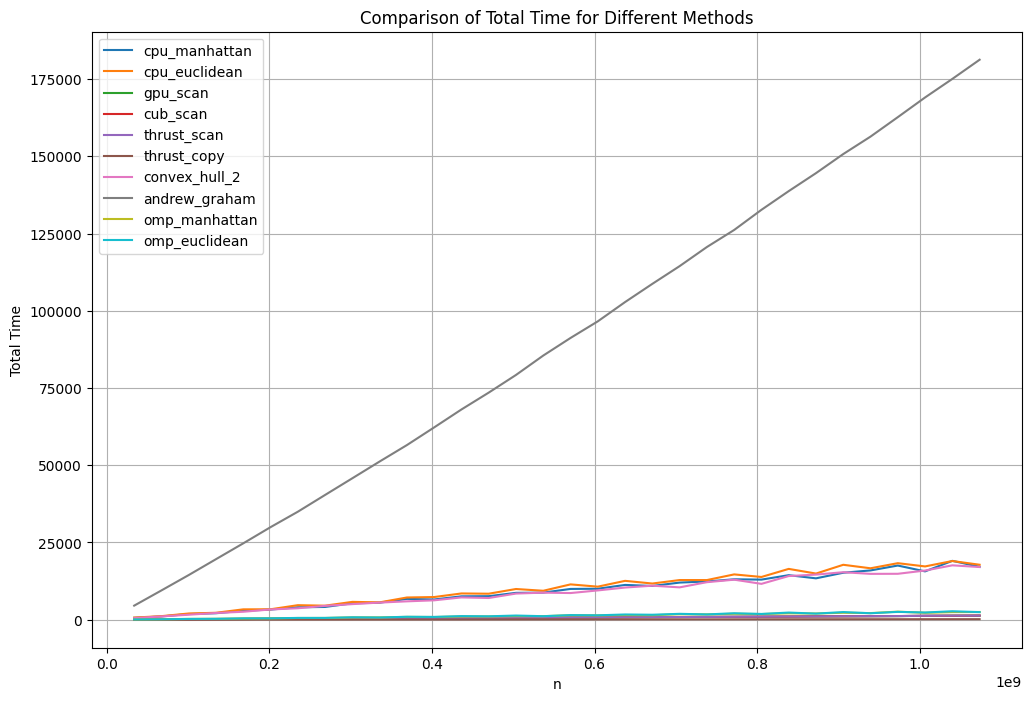

In [219]:
import matplotlib.pyplot as plt

# Combining plots for all datasets with 'total' column

plt.figure(figsize=(12, 8))

speedup_data_corrected = data_frames['convex_hull_2']

# Iterating through each DataFrame and plotting n vs total time
for prefix, df in data_frames.items():
    if 'total' in df.columns:
        plt.plot(df.index, df['total'], label=prefix)

plt.xlabel('n')
plt.ylabel('Total Time')
plt.title('Comparison of Total Time for Different Methods')
plt.legend()
plt.grid(True)
plt.show()


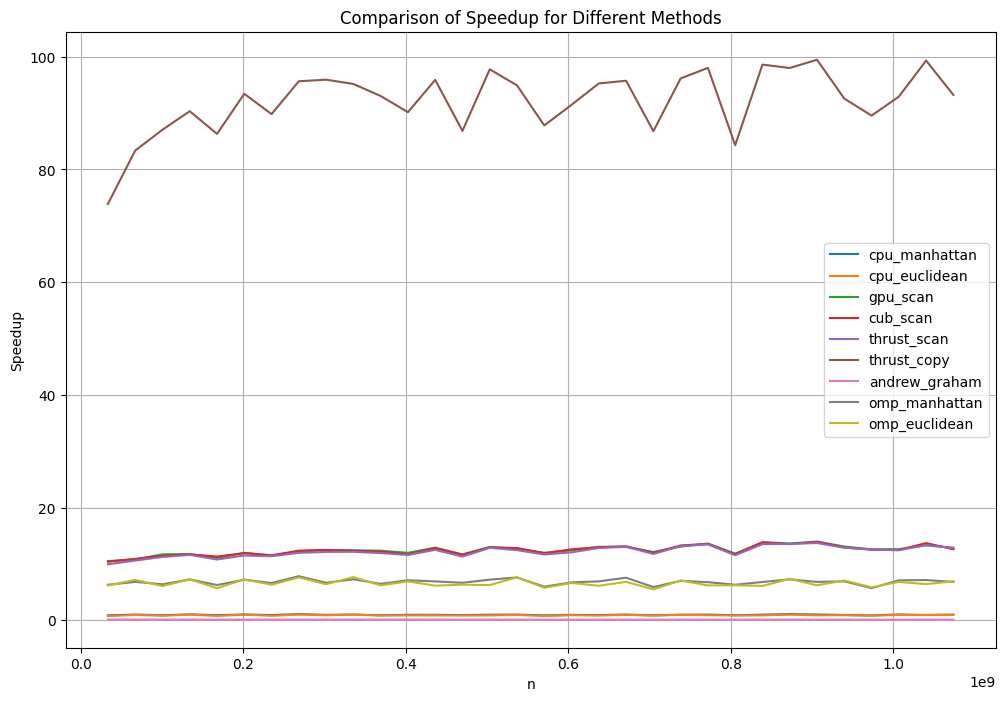

In [220]:
import matplotlib.pyplot as plt

# Combining plots for all datasets with 'total' column

plt.figure(figsize=(12, 8))

speedup_data_corrected = data_frames['convex_hull_2']

# Iterating through each DataFrame and plotting n vs total time
for prefix, df in data_frames.items():
    if 'total' in df.columns:
        if prefix != "convex_hull_2":
            plt.plot(df.index, speedup_data_corrected['total']/df['total'], label=prefix)

plt.xlabel('n')
plt.ylabel('Speedup')
plt.title('Comparison of Speedup for Different Methods')
plt.legend()
plt.grid(True)
plt.show()


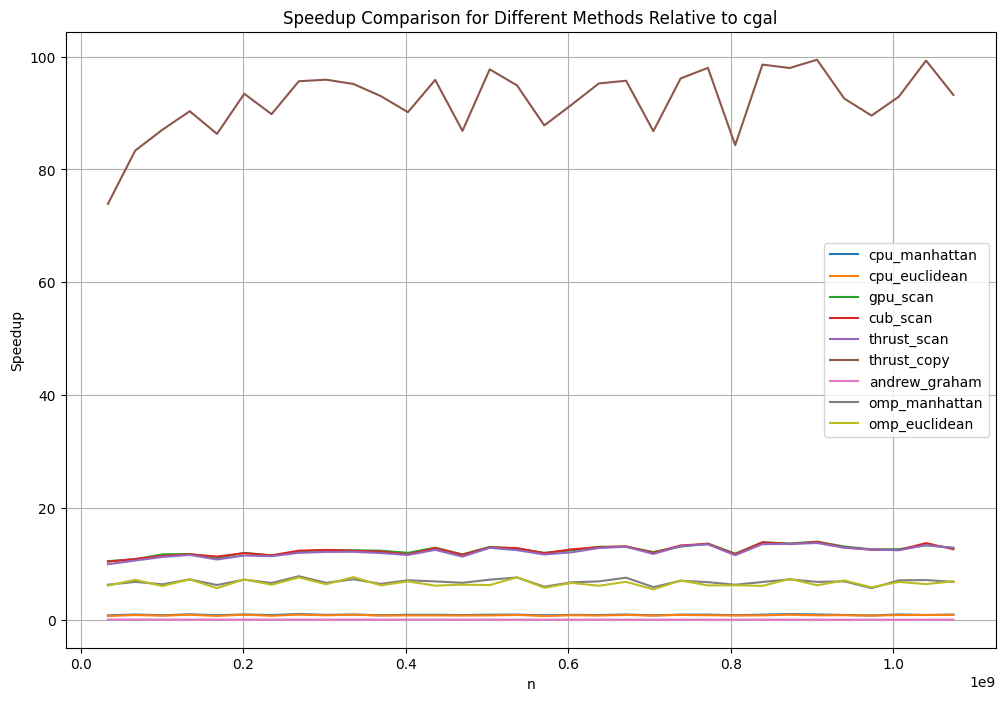

In [221]:
import matplotlib.pyplot as plt

# Suma de las columnas especificadas para cada conjunto de datos
for prefix, df in data_frames.items():
    if set(["find_extremes", "find_corners", "find_points_in_Q", 
            "compaction", "copy2host", "cgal_convex_hull"]).issubset(df.columns):
        df['summed_total'] = df[["find_extremes", "find_corners", "find_points_in_Q",
                                 "compaction", "copy2host", "cgal_convex_hull"]].sum(axis=1)

# Ahora, calculamos el speedup respecto a cpu_euclidean
speedup_data_corrected = data_frames['convex_hull_2']
speedup_data_corrected['summed_total'] = speedup_data_corrected[["find_extremes", "find_corners", 
                                                                 "find_points_in_Q", "compaction", 
                                                                 "copy2host", "cgal_convex_hull"]].sum(axis=1)

# Graficar el speedup
plt.figure(figsize=(12, 8))

for prefix, df in data_frames.items():
    if 'summed_total' in df.columns:
        if prefix != "convex_hull_2":
            plt.plot(df.index, speedup_data_corrected['summed_total']/df['summed_total'], label=prefix)

plt.xlabel('n')
plt.ylabel('Speedup')
plt.title('Speedup Comparison for Different Methods Relative to cgal')
plt.legend()
plt.grid(True)
plt.show()


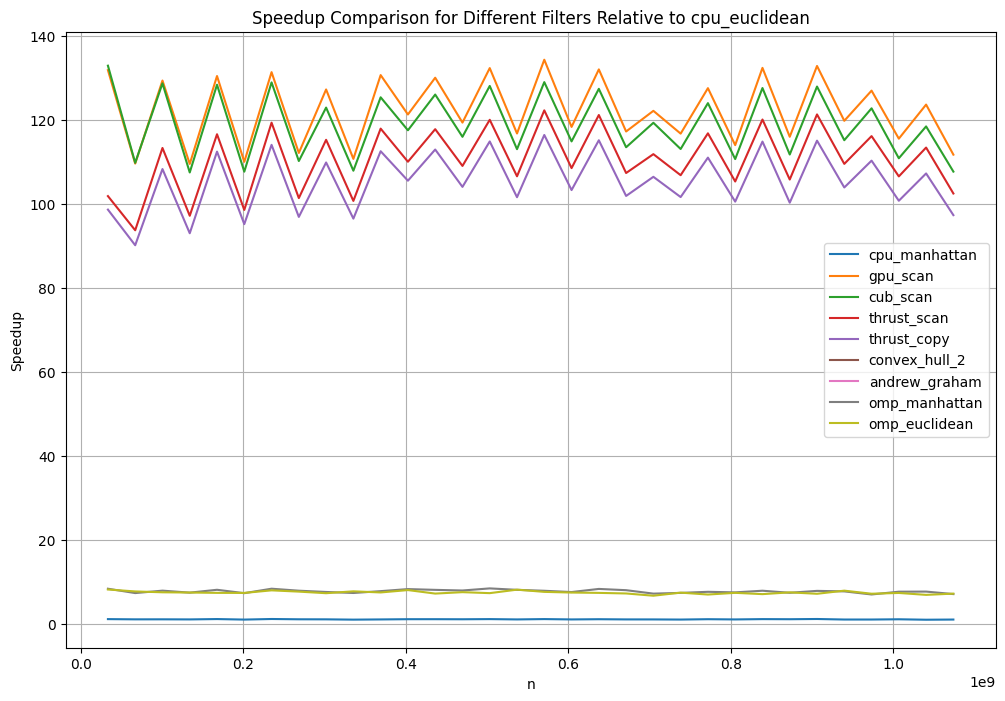

In [222]:
import matplotlib.pyplot as plt

# Suma de las columnas especificadas para cada conjunto de datos
for prefix, df in data_frames.items():
    if set(["find_extremes", "find_corners", "find_points_in_Q", 
            "compaction", "copy2host", "cgal_convex_hull"]).issubset(df.columns):
        df['filter'] = df[["find_extremes", "find_corners", "find_points_in_Q",
                                 "compaction"]].sum(axis=1)

# Ahora, calculamos el speedup respecto a cpu_euclidean
speedup_data_corrected = data_frames['cpu_euclidean']
speedup_data_corrected['filter'] = speedup_data_corrected[["find_extremes", "find_corners", 
                                                                 "find_points_in_Q", "compaction"]].sum(axis=1)

# Graficar el speedup
plt.figure(figsize=(12, 8))

for prefix, df in data_frames.items():
    if 'filter' in df.columns:
        if prefix != "cpu_euclidean":
            plt.plot(df.index, speedup_data_corrected['filter']/df['filter'], label=prefix)

plt.xlabel('n')
plt.ylabel('Speedup')
plt.title('Speedup Comparison for Different Filters Relative to cpu_euclidean')
plt.legend()
plt.grid(True)
plt.show()


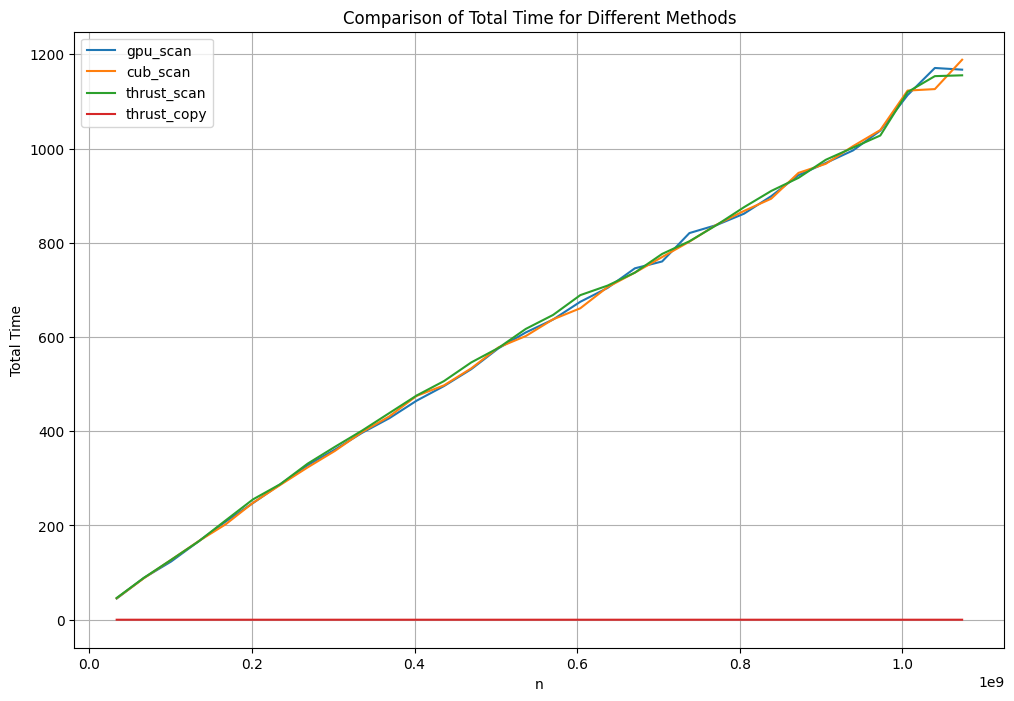

In [223]:
import matplotlib.pyplot as plt

# Combining plots for all datasets with 'total' column

plt.figure(figsize=(12, 8))

# Iterating through each DataFrame and plotting n vs total time
for prefix, df in data_frames.items():
    if prefix != "cpu_euclidean" and prefix != "cpu_manhattan" and prefix != "omp_euclidean" and prefix != "omp_manhattan" and prefix != "convex_hull_2" and prefix != "andrew_graham":
        if 'copy2host' in df.columns:
            plt.plot(df.index, df['copy2host'], label=prefix)

plt.xlabel('n')
plt.ylabel('Total Time')
plt.title('Comparison of Total Time for Different Methods')
plt.legend()
plt.grid(True)
plt.show()


In [224]:
data_frames['thrust_copy'].head(10)

,size,hull,seed,copy2device,find_extremes,find_corners,find_points_in_Q,compaction,copy2host,delete,preparation,cgal_convex_hull,total,summed_total,filter
n,,,,,,,,,,,,,,,
33554432,83.65,19.40,0.0,21.174610,2.273814,3.887026,0.001618,0.953939,0.012202,0.0,0.002542,0.011224,7.139822,7.139822,7.116396
67108864,109.30,20.60,0.0,42.695135,3.867330,7.266066,0.001434,1.728183,0.013773,0.0,0.002626,0.012890,12.889670,12.889674,12.863012
100663296,202.40,20.20,0.0,65.988885,5.433520,10.728350,0.001797,2.515434,0.014867,0.0,0.002654,0.017373,18.711350,18.711340,18.679100
134217728,143.95,21.10,0.0,88.614070,6.994347,13.997325,0.001470,3.267032,0.013122,0.0,0.002445,0.014600,24.287880,24.287896,24.260174
167772160,212.65,19.45,0.0,111.841300,8.564314,17.306585,0.001531,4.040983,0.013734,0.0,0.002645,0.017706,29.944860,29.944852,29.913412
201326592,187.40,20.95,0.0,135.036300,10.129835,20.655510,0.001614,4.823100,0.013781,0.0,0.002786,0.017085,35.640920,35.640925,35.610059
234881024,179.20,21.75,0.0,165.351900,11.717165,24.012855,0.001726,5.593063,0.015062,0.0,0.003704,0.017050,41.356915,41.356921,41.324809
268435456,215.50,20.15,0.0,184.068150,13.294785,27.337505,0.001574,6.357541,0.016083,0.0,0.004226,0.019523,47.027020,47.027012,46.991405
301989888,178.80,21.00,0.0,207.062400,14.839560,30.680110,0.001659,7.152550,0.015483,0.0,0.003422,0.017525,52.706875,52.706887,52.673879


In [225]:
data_frames['gpu_scan'].head(10)

,size,hull,seed,copy2device,find_extremes,find_corners,find_points_in_Q,compaction,copy2host,delete,preparation,cgal_convex_hull,total,summed_total,filter
n,,,,,,,,,,,,,,,
33554432,139.55,19.65,0.0,18.831960,0.763118,3.245426,0.798429,0.516934,44.954385,0.0,0.011658,0.016635,50.29493,50.294928,5.323908
67108864,148.10,20.35,0.0,42.663680,1.446821,6.590586,1.547709,0.996469,88.788910,0.0,0.011810,0.016605,99.38701,99.387099,10.581584
100663296,183.55,20.15,0.0,66.032235,2.134587,9.832327,2.289265,1.380610,123.695850,0.0,0.016610,0.020032,139.35275,139.352670,15.636788
134217728,211.70,20.00,0.0,89.460995,2.814355,13.006260,3.022239,1.761974,166.146250,0.0,0.016467,0.020328,186.77145,186.771407,20.604829
167772160,118.30,20.55,0.0,113.502000,3.497834,16.413130,3.743658,2.131153,208.517300,0.0,0.011693,0.015616,234.31870,234.318691,25.785775
201326592,143.60,21.00,0.0,137.758450,4.180086,19.593700,4.516102,2.519248,247.694250,0.0,0.012288,0.016736,278.52025,278.520123,30.809137
234881024,192.15,20.35,0.0,162.325800,4.865259,22.966825,5.176509,2.870849,287.461950,0.0,0.015382,0.019600,323.36105,323.360992,35.879442
268435456,171.50,20.45,0.0,186.835050,5.546456,25.864825,5.927553,3.272558,327.876550,0.0,0.015664,0.018931,368.50685,368.506873,40.611391
301989888,152.85,21.80,0.0,211.407450,6.230027,28.901375,6.677357,3.668684,361.012350,0.0,0.015403,0.018699,406.50850,406.508492,45.477443


In [226]:
prefixes = ["cpu_manhattan", "cpu_euclidean", "gpu_scan", "cub_scan", "thrust_scan", "thrust_copy","convex_hull_2","andrew_graham", "omp_manhattan", "omp_euclidean"]

# Example usage of the function
directory = '../data/'
data_frames = {}

# Loading JSON data for each prefix into a separate data frame
for prefix in prefixes:
    data_frames[prefix] = load_json_to_table(directory, prefix+'_uniform_')

In [227]:
data_frames['cpu_euclidean'].head(10)

,size,hull,seed,copy2device,find_extremes,find_corners,find_points_in_Q,compaction,copy2host,delete,preparation,cgal_convex_hull,total
n,,,,,,,,,,,,,
33554432,7408.05,44.40,0.0,0.0,89.09150,191.1290,0.0,401.31620,0.0,0.0,1.266639,0.648368,682.18510
67108864,10131.95,45.35,0.0,0.0,189.67945,319.6268,0.0,713.32465,0.0,0.0,0.935861,0.928736,1223.56015
100663296,11993.20,42.70,0.0,0.0,261.15075,582.4116,0.0,1102.06175,0.0,0.0,2.000373,1.147599,1946.77150
134217728,15390.30,43.25,0.0,0.0,371.49810,649.9288,0.0,1397.15400,0.0,0.0,2.748146,1.493218,2420.07450
167772160,16071.95,42.95,0.0,0.0,488.08075,998.7025,0.0,1844.49000,0.0,0.0,2.447075,1.567994,3332.84100
201326592,17472.55,44.30,0.0,0.0,562.91590,984.5981,0.0,2051.64400,0.0,0.0,3.232605,1.732647,3600.89300
234881024,17433.40,41.25,0.0,0.0,679.12045,1380.7005,0.0,2739.12600,0.0,0.0,4.006662,1.739608,4800.68700
268435456,21384.45,41.10,0.0,0.0,729.29915,1296.8920,0.0,2634.66350,0.0,0.0,4.844500,2.147733,4663.00200
301989888,19289.70,40.65,0.0,0.0,835.75410,1780.4685,0.0,3349.85550,0.0,0.0,3.930442,1.945010,5968.02400


In [228]:
5625.9835 / 58.349780

96.41824699253365